# Structured perceptron

### Load libraries and data

In [1]:
from pathlib import Path
import numpy as np
import os,sys
import pandas as pd
from sklearn import *
import os
import skseq
from skseq.sequences.extended_feature import ExtendedFeatures
import utils

currentdir = Path.cwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 


In [2]:
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\manue\\Documents\\workspace\\Unity\\babies_vs_satan\\nlp_name_entity_recognition\\utils.py'>

### Generate feature and label vectors

We need a sequence with each sentence, x having every word in a string and the tags in another vector

In [3]:
X_tr, y_tr = utils.gen_set("./data/train_data_ner.csv")
X_test, y_test = utils.gen_set("./data/test_data_ner.csv")
X_tiny, y_tiny = utils.gen_set("./data/tiny_test.csv")

To create a sequence list, first we need a dictionary for the words and another for the tags

In [4]:
word_dict, tag_dict, rev_dict = utils.dictionary(X_tr, y_tr)

In [5]:
print(word_dict)
print(tag_dict)
print(rev_dict)

{'Thousands': 0, 'of': 1, 'demonstrators': 2, 'have': 3, 'marched': 4, 'through': 5, 'London': 6, 'to': 7, 'protest': 8, 'the': 9, 'war': 10, 'in': 11, 'Iraq': 12, 'and': 13, 'demand': 14, 'withdrawal': 15, 'British': 16, 'troops': 17, 'from': 18, 'that': 19, 'country': 20, '.': 21, 'Helicopter': 22, 'gunships': 23, 'Saturday': 24, 'pounded': 25, 'militant': 26, 'hideouts': 27, 'Orakzai': 28, 'tribal': 29, 'region': 30, ',': 31, 'where': 32, 'many': 33, 'Taliban': 34, 'militants': 35, 'are': 36, 'believed': 37, 'fled': 38, 'avoid': 39, 'an': 40, 'earlier': 41, 'military': 42, 'offensive': 43, 'nearby': 44, 'South': 45, 'Waziristan': 46, 'They': 47, 'left': 48, 'after': 49, 'a': 50, 'tense': 51, 'hour-long': 52, 'standoff': 53, 'with': 54, 'riot': 55, 'police': 56, 'U.N.': 57, 'relief': 58, 'coordinator': 59, 'Jan': 60, 'Egeland': 61, 'said': 62, 'Sunday': 63, 'U.S.': 64, 'Indonesian': 65, 'Australian': 66, 'helicopters': 67, 'ferrying': 68, 'out': 69, 'food': 70, 'supplies': 71, 'remot

We use the class SequenceList from the skseq package used in the code provided in class. This package also includes a class for dictionaries called LabelDictionary defines some useful functions needed for creating the sequence, so we need to transform our dictionaries into these ones.

In [6]:
seq = utils.get_seq(word_dict, tag_dict, X_tr, y_tr)

### Baseline model

We need to inizialice the feature mapper first with the sequence created:

In [3]:
feature_mapper = skseq.sequences.id_feature.IDFeatures(seq)

NameError: name 'seq' is not defined

In [26]:
feature_mapper.build_features()

In [27]:
print ("Initial features:",     feature_mapper.feature_list[1][0])
print ("Transition features:",  feature_mapper.feature_list[1][1])
print ("Final features:",       feature_mapper.feature_list[1][2])
print ("Emission features:",    feature_mapper.feature_list[1][3])

Initial features: [[0]]
Transition features: [[3], [32], [34], [3], [3], [3], [3], [9], [11], [3], [3], [3], [3], [44], [46], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [9], [58], [59]]
Final features: [[28]]
Emission features: [[29], [30], [31], [33], [35], [36], [15], [13], [37], [38], [39], [40], [41], [42], [43], [45], [47], [48], [10], [5], [49], [10], [50], [51], [52], [53], [54], [15], [55], [56], [57], [27]]


In [52]:
import skseq.sequences.structured_perceptron as spc

sp = spc.StructuredPerceptron(word_dict, tag_dict, feature_mapper)
sp.num_epochs = 5
pred_train = sp.viterbi_decode_corpus(seq)
sp.fit(feature_mapper.dataset, 10)

Epoch: 0 Accuracy: 0.893522
Epoch: 1 Accuracy: 0.931903
Epoch: 2 Accuracy: 0.941308
Epoch: 3 Accuracy: 0.946066
Epoch: 4 Accuracy: 0.949996
Epoch: 5 Accuracy: 0.952464
Epoch: 6 Accuracy: 0.954540
Epoch: 7 Accuracy: 0.956122
Epoch: 8 Accuracy: 0.957765
Epoch: 9 Accuracy: 0.957984


In [54]:
sp.save_model("./sp_base_")

Load and test

In [28]:
import skseq.sequences.structured_perceptron as spc
sp = spc.StructuredPerceptron(word_dict, tag_dict, feature_mapper)
sp.num_epochs = 5
sp.load_model(dir="sp_base_")

In [33]:
y_hats = utils.get_predictions(sp, X_tr)

In [34]:
y_tr_ls = np.array([tag_dict[t] for t in np.concatenate(y_tr)])

{'accuracy': 0.817145342425325, 'f1_score': 0.9659153023778247}

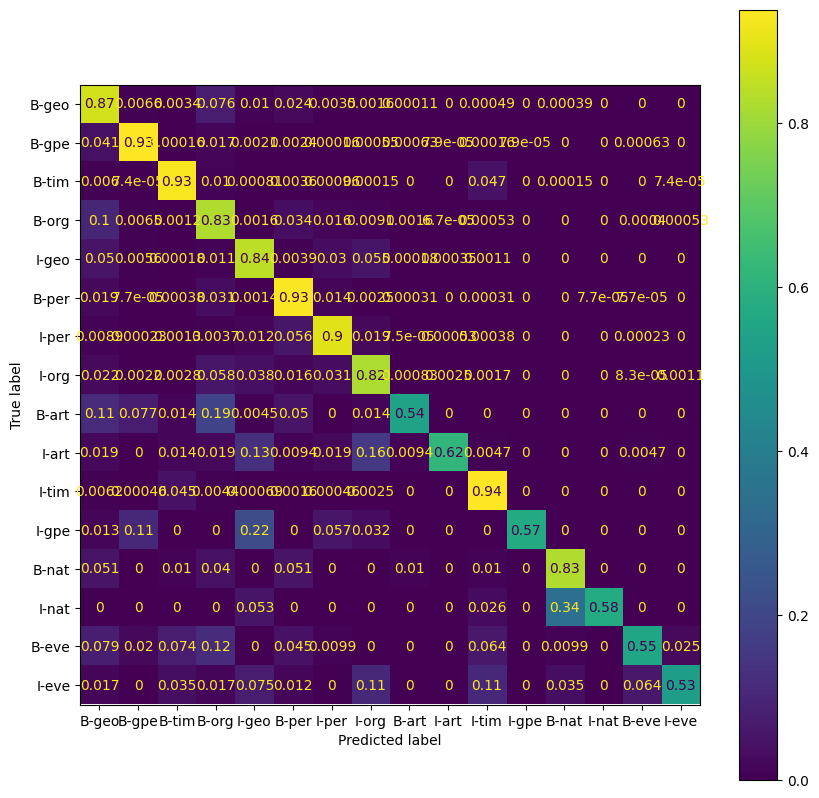

In [66]:
utils.evaluate(y_tr_ls, y_hats, rev_dict)

### Extended Features

In [7]:
feature_mapper_extra = ExtendedFeatures(seq)
feature_mapper_extra.build_features()

In [8]:
import skseq.sequences.structured_perceptron as spc

sp = spc.StructuredPerceptron(word_dict, tag_dict, feature_mapper_extra)
sp.num_epochs = 5

In [9]:
_ = sp.viterbi_decode_corpus(seq)

In [10]:
sp.fit(feature_mapper_extra.dataset, 10)

Epoch: 0 Accuracy: 0.927759
Epoch: 1 Accuracy: 0.943190
Epoch: 2 Accuracy: 0.947456
Epoch: 3 Accuracy: 0.950061
Epoch: 4 Accuracy: 0.951921
Epoch: 5 Accuracy: 0.953107
Epoch: 6 Accuracy: 0.954318
Epoch: 7 Accuracy: 0.955487
Epoch: 8 Accuracy: 0.956453
Epoch: 9 Accuracy: 0.957303


In [11]:
sp.save_model("./sp_ext_")

In [12]:
sp = spc.StructuredPerceptron(word_dict, tag_dict, feature_mapper_extra)
sp.num_epochs = 5
sp.load_model(dir="sp_ext_")

In [13]:
y_hats = utils.get_predictions(sp, X_tr)

In [14]:
y_tr_ls = np.array([tag_dict[t] for t in np.concatenate(y_tr)])

{'accuracy': 0.8353578030102984, 'f1_score': 0.9632629367274036}

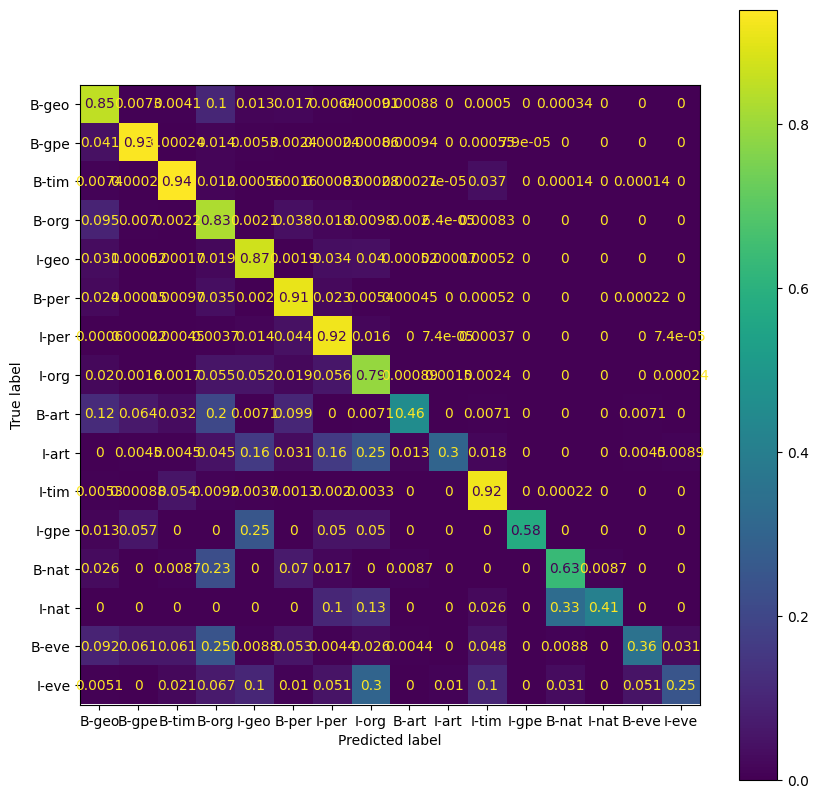

In [15]:
utils.evaluate(y_tr_ls, y_hats, rev_dict)